### Tarea 4, Métodos Numéricos, Miguel Angel Ruiz Ortiz

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from numerical_methods import solveByGaussianElimination
from typing import Callable, List, Optional

### Problema 2

Considera la función 
$$f(x) = e^{6x} + 3(\ln 2)^2e^{2x} - (\ln 8)e^{4x} - (\ln 2)^3.$$

In [2]:
def f(x: float) -> float:
    return math.exp(6*x) + 3*(math.log(2)**2)*math.exp(2*x)-math.log(8)*math.exp(4*x) - (math.log(2))**3

a) Implementa un método de localización de raíces y obtén un intervalo cercano a la raíz.

Primero averiguaremos el comportamiento de la función a través de su gráfica para encontrar $a, b \in \mathbb{R}$ tales que $f(a)f(b) < 0$.

[(-10, -0.33302464901806705),
 (-9, -0.3330246300370609),
 (-8, -0.3330244897853642),
 (-7, -0.3330234534589295),
 (-6, -0.33301579605140097),
 (-5, -0.33295921867562617),
 (-4, -0.33254136386959726),
 (-3, -0.3294646414272511),
 (-2, -0.3073166709829284),
 (-1, -0.17356546601839162),
 (0, 0.028892848085838863),
 (1, 300.21239038118347)]

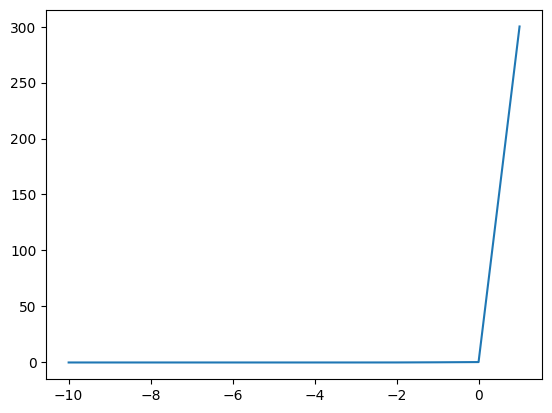

In [3]:
x_axis = np.arange(-10, 2)
y_axis = np.array([f(x) for x in x_axis])
plt.plot(x_axis, y_axis)
list(zip(x_axis, y_axis)) # pares (x, f(x))

Con esto notamos que $f(x)<0$ para $x < = -1$, y $f(1) >> 0$. Así que debe existir una raíz en el intervalo $[-1, 1]$. Usaremos el método de la bisección para encontrar un intervalo más pequeño cercano a la raíz.

In [4]:
def MetodoBiseccion(f: Callable[[float], float], a: float, b: float, epsilon: float, TOL: float = 1e-8) -> float:
    """Método de la bisección para localización de raíces de una función f continua en un intervalo [a, b] tal que f(a)f(b) < 0. Si se necesita encontrar un intervalo [d, c] que contenga a la raíz
    de tamaño menor que epsilon, entonces se regresa el punto medio del intervalo. Si la función encuentra la raíz m en algún momento (|f(m)| < TOL), entonces se regresa m.

    :param f: Función continua f a la que se le quiere localizar una raíz.
    :type f: Callable[[float], float]
    :param a: Extremo izquierdo del intervalo en donde se buscará la raíz.
    :type a: float
    :param b: Extremo derecho del intervalo en donde se buscará la raíz.
    :type b: float
    :param epsilon: Tamaño del intervalo que contendrá a la raíz.
    :type epsilon: float
    :param TOL: Tolerancia para saber si se ha encontrado una raíz m, i.e., si |f(m)| < TOL (un número pequeño), defaults to 1e-8
    :type TOL: float, optional
    :raises Exception: Se levanta una excepción si no se cumple que f(a)f(b) < 0.
    :return: Punto medio del intervalo de tamaño epsilon que contendrá a la raíz (puede coincidir con la raíz).
    :rtype: float
    """    
    
    if f(a)*f(b) > 0:
        raise Exception("Se necesita que f(a)f(b) < 0.")
    
    while abs(b-a) > epsilon:
        m  = (a+b)/2
        
        if abs(f(m)) < TOL:
            return m
        
        if f(m)*f(a) > 0:
            a = m
        else:
            b = m
    
    return (a+b)/2

Obtenemos un intervalo de tamaño $\epsilon = 0.5$ que contiene a la raíz:

In [5]:
epsilon = 0.5
m = MetodoBiseccion(f, -1, 1, epsilon)
print(f"Intervalo que contiene a la raíz de f: [{m-epsilon/2}, {m+epsilon/2}]")
print("Punto medio:", m)
print("Valor de f en punto medio:", f(m))

Intervalo que contiene a la raíz de f: [-0.5, 0.0]
Punto medio: -0.25
Valor de f en punto medio: -0.0006498336641710956


b) Usar el método de Newton o de la secante para aproximar a una raíz de $f$, tomando $x_0$ dentro del intervalo propuesto en el apartado anterior y una condición de paro $|x_{k+1} − x_k| < 0.0002$. Presenta la tabla de iterados.

In [6]:
def MetodoNewton(
    f: Callable[[float], float], 
    df: Callable[[float], float], 
    x0: float, 
    epsilon: float,
    MAX_ITER: int = 10**5,
    iterates: Optional[List[float]] = None
    ) -> float:
    """Método de Newton para encontrar una raíz de una función diferenciable f. Es un método iterativo cuyo valor inicial x0 debe ser cercano a la raíz.

    :param f: Función diferenciable a la cual se le quiere encontrar una raíz.
    :type f: Callable[[float], float]
    :param df: Derivada de f.
    :type df: Callable[[float], float]
    :param x0: Valor inicial del algoritmo iterativo.
    :type x0: float
    :param epsilon: Tolerancia para condición de paro, i.e., se detienen las iteraciones cuando |x_{k+1} - x_k| < epsilon
    :type epsilon: float
    :param MAX_ITER: Número máximo de iteraciones en el algoritmo
    :type MAX_ITER: int
    :param iterates: Lista opcional para guardar los iterados, defaults to None
    :type iterates: Optional[List[float]], optional
    :raises Exception: Se levanta una excepción si se llega al número máximo de iteraciones sin haber llegado a la condición de paro
    :return: Raíz de la función f
    :rtype: float
    """    

    xk = x0
    
    if iterates is not None:
        iterates.append(xk)
    
    for _ in range(MAX_ITER):        
        xk_1 = xk - f(xk)/df(xk)
        
        if iterates is not None:
            iterates.append(xk_1)
        
        if abs(xk_1 - xk) < epsilon:
            return xk_1
        
        xk = xk_1
    
    raise Exception("El método de Newton no convergió (máximo número de iteraciones alcanzado)")

Usaremos el método de Newton, por lo que ocupamos la derivada de $f$. Su derivada es
$$f'(x) = 6e^{6x} + 6(\ln 2)^2e^{2x} - 4(\ln 8)e^{4x}.$$

In [7]:
def df(x: float) -> float:
    # derivada de f
    return 6*math.exp(6*x) + 6*(math.log(2)**2)*math.exp(2*x)-4*math.log(8)*math.exp(4*x)

In [8]:
iterates = []
raiz = MetodoNewton(
    f=f,
    df=df,
    x0=m,
    epsilon=2e-4,
    MAX_ITER=10000, 
    iterates=iterates
)
print(f"Raíz encontrada (en {len(iterates)-1} iteraciones):", raiz)
print("Función evaluada en la raíz:", f(raiz))

Raíz encontrada (en 13 iteraciones): -0.1835669704142422
Función evaluada en la raíz: -7.9687312304344e-11


La tabla de iterados se muestra a continuación. La primera columna "Iterados" muestra las iteraciones (empezando desde el valor inicial), y la segunda columna muestra la diferencia en valor absoluto de una iteración y la iteración anterior (i.e., $|x_k - x_{k-1}|$).

In [9]:
table = pd.DataFrame(
    {
        "Iterados": iterates, 
        "|x_k - x_{k-1}|": [None] + [abs(iterates[i+1] - iterates[i]) for i in range(len(iterates)-1)]
    }, 
    index=[f"Iteración {i}" for i in range(len(iterates))]
    )
table

,Iterados,|x_k - x_{k-1}|
Iteración 0,-0.250000,NaN
Iteración 1,-0.226199,0.023801
Iteración 2,-0.211252,0.014947
Iteración 3,-0.201654,0.009598
Iteración 4,-0.195407,0.006247
Iteración 5,-0.191307,0.004100
Iteración 6,-0.188602,0.002705
Iteración 7,-0.186811,0.001791
Iteración 8,-0.185622,0.001189
Iteración 9,-0.184831,0.000790


c) Luego construye una sucesión $\{x_k\}_{k\geq 0}$ mediante el método de Aitken que aproxime la raíz de $f$. Presenta la tabla de iterados. ¿Se aceleró la covergencia? Justifica tu respuesta.

In [10]:
def AceleracionAitken(x_n: List[float]) -> List[float]:
    """Aplica el método de Aitken a una sucesión dada para acelerar su convergencia.

    :param x_n: Sucesión de interés, i.e., una lista de números.
    :type x_n: List[float]
    :raises Exception: Se levanta una excepción si la lista tiene menos de 3 elementos. El método necesita al menos 3.
    :return: Sucesión de Aitken
    :rtype: List[float]
    """    
    n = len(x_n)
    
    if n < 3: 
        raise Exception("El método de aceleración de Aitken necesita al menos 3 elementos de la sucesión.")
    
    aitken = [x_n[i] - (x_n[i+1]-x_n[i])**2/(x_n[i+2]-2*x_n[i+1]+x_n[i]) for i in range(n-2)]
    
    return aitken

A continuación se presenta la tabla de iterados de la sucesión de Aitken y se compara con los iterados del método de Newton. 
- La primera columna muestra los iterados del método de Newton.
- La segunda columna muestra los valores $|x_k-x_{k-1}|$ para el método de Newton.
- La tercera columna muestra la diferencia $|x_k-\alpha|$, donde $\alpha$ fue la raíz encontrada en el inciso anterior ($\alpha \approx -0.1835$) y $\{x_k\}_k$ son los iterados del método de Newton.
- La cuarta columna muestra los iterados de la sucesión de Aitken.
- La quinta columna muestra los valores $|x_k-x_{k-1}|$ en la sucesión de Aitken.
- La sexta columna muestra los diferencia $|x_k-\alpha|$, donde $\alpha$ fue la raíz encontrada y $\{x_k\}_k$ es la sucesión de Aitken.

In [11]:
aitken = AceleracionAitken(iterates)
table = pd.DataFrame(
    {
        "Newton": iterates, 
        "|x_k - x_{k-1}| (Newton)": [None] + [abs(iterates[i+1] - iterates[i]) for i in range(len(iterates)-1)],
        "|x_k - alpha| (Newton)": [abs(iterates[i] - raiz) for i in range(len(iterates))],
        "Aitken": [None, None]+aitken,
        "|x_k - x_{k-1}| (Aitken)": [None, None, None] + [abs(aitken[i+1] - aitken[i]) for i in range(len(aitken)-1)],
        "|x_k - alpha| (Aitken)": [None, None]+[abs(aitken[i] - raiz) for i in range(len(aitken))], 
    }, 
    index=[f"Iteración {i}" for i in range(len(iterates))]
    )
table

,Newton,|x_k - x_{k-1}| (Newton),|x_k - alpha| (Newton),Aitken,|x_k - x_{k-1}| (Aitken),|x_k - alpha| (Aitken)
Iteración 0,-0.250000,NaN,0.066433,NaN,NaN,NaN
Iteración 1,-0.226199,0.023801,0.042632,NaN,NaN,NaN
Iteración 2,-0.211252,0.014947,0.027685,-0.186020,NaN,0.002454
Iteración 3,-0.201654,0.009598,0.018087,-0.184431,1.589774e-03,0.000864
Iteración 4,-0.195407,0.006247,0.011840,-0.183764,6.670754e-04,0.000197
Iteración 5,-0.191307,0.004100,0.007740,-0.183478,2.858884e-04,0.000089
Iteración 6,-0.188602,0.002705,0.005035,-0.183354,1.241159e-04,0.000213
Iteración 7,-0.186811,0.001791,0.003244,-0.183299,5.432464e-05,0.000268
Iteración 8,-0.185622,0.001189,0.002055,-0.183275,2.390251e-05,0.000292
Iteración 9,-0.184831,0.000790,0.001264,-0.183265,1.055299e-05,0.000302


In [12]:
raiz

-0.1835669704142422

Vemos que sí hay una aceleración en la convergencia utilizando el método de Aitken, ya que para el cuarto término de la sucesión de Aitken (6to renglón de la tabla) se obtiene un valor que dista de la raíz encontrada en $8.9\times 10^{-5}$, además que la distancia entre términos consecutivos de la sucesión de Aitken rápidamente cae al orden de $10^{-4}$ (ver 5ta columna de la tabla a partir del 5to renglón), mientras que esto sólo sucede hasta la iteración 13 del método de Newton.

### Problema 3

Considera el sistema no lineal
$$
x^2 - 10x + y^2 + 8 = 0, \\
xy^2 + x - 10y + 8 = 0.
$$

a) Aplicar el método de Newton adaptado para sistemas con $X_0=(1, −1)$, considera una tolerancia de $10^{−6}$.

In [15]:
def MetodoNewtonMultivariado(
    F: Callable[[np.array], np.array], 
    J_F: Callable[[np.array], np.array], 
    x0: np.array, 
    epsilon: float,
    MAX_ITER: int = 10**5,
    iterates: Optional[List[np.array]] = None
    ) -> np.array:
    """Método de Newton para encontrar una raíz de una función diferenciable F de R^n a R^n, i.e., resolver F(X) = 0. Es un método iterativo cuyo vector inicial x0 debe ser cercano a la raíz.

    :param F: Función de R^n a R^n diferenciable a la cual se le quiere encontrar una raíz (F(X) = 0).
    :type F: Callable[[np.array], np.array]
    :param J_F: Jacobiano de f. Función que recibe un vector x n-dimensional y regresa la matriz Jacobiana de F evaluada en x (de nxn).
    :type J_F: Callable[[np.array], np.array]
    :param x0: Vector n-dimensional inicial del algoritmo iterativo.
    :type x0: np.array
    :param epsilon: Tolerancia para condición de paro, i.e., se detienen las iteraciones cuando ||x_{k+1} - x_k|| < epsilon
    :type epsilon: float
    :param MAX_ITER: Número máximo de iteraciones en el algoritmo
    :type MAX_ITER: int
    :param iterates: Lista opcional para guardar los iterados, defaults to None
    :type iterates: Optional[List[np.array]], optional
    :raises Exception: Se levanta una excepción si se llega al número máximo de iteraciones sin haber llegado a la condición de paro
    :return: Vector raíz X tal que F(X) = 0.
    :rtype: np.array
    """    

    xk = x0
    
    if iterates is not None:
        iterates.append(xk)
    
    for _ in range(MAX_ITER):
        # x_{k+1} = x_k - J_F^{-1}(x_k)F(x_k)
        # Para evitar calcular J_F^{-1}(x_k), resolvemos el sistema  J_F(x_k)z = -F(x_k) para z y hacemos x_{k+1} = z + x_k
        z = solveByGaussianElimination(J_F(xk), -F(xk))
        xk_1 = z + xk
        
        if iterates is not None:
            iterates.append(xk_1)
        
        if np.linalg.norm(xk_1 - xk) < epsilon:
            return xk_1
        
        xk = xk_1
    
    raise Exception("El método de Newton multivariado no convergió (máximo número de iteraciones alcanzado)")

Queremos encontrar $(x,y)$ tal que $F(x,y) = (0,0)$, donde 
$$
F(x,y) = (x^2-10x+y^2+8, xy^2 + x - 10y + 8).
$$
Notemos que su matriz Jacobiana es
$$
J_F(x,y) = \begin{pmatrix}
2x - 10 & 2y \\
y^2 + 1 & 2xy - 10
\end{pmatrix}.
$$

In [22]:
def F(x: np.array) -> np.array:
    # Función F de R^2 a R^2
    return np.array([x[0]**2 - 10*x[0] + x[1]**2 + 8, x[0]*x[1]**2 + x[0] - 10*x[1] + 8], dtype="float64")

def J_F(x: np.array) -> np.array:
    # Jacobiano de F
    return np.array([
        [2*x[0] - 10, 2*x[1]],
        [x[1]**2 + 1, 2*x[0]*x[1] - 10],
        ], dtype="float64")

In [23]:
x0 = np.array([1, -1])
iterates = []
raiz = MetodoNewtonMultivariado(F, J_F, x0, 1e-6, iterates=iterates)
raiz

array([1., 1.])

In [27]:
table1 = pd.DataFrame(
    {
        "Iterados": iterates, 
        "||x_k - x_{k-1}||": [None] + [np.linalg.norm(iterates[i+1] - iterates[i]) for i in range(len(iterates)-1)]
    }, 
    index=[f"Iteración {i}" for i in range(len(iterates))]
    )
table1

,Iterados,||x_k - x_{k-1}||
Iteración 0,"[1, -1]",NaN
Iteración 1,"[0.6, 0.6000000000000001]",1.649242e+00
Iteración 2,"[0.9576169532187125, 0.9558576569372251]",5.045043e-01
Iteración 3,"[0.9993403358173603, 0.9991691432820147]",6.013922e-02
Iteración 4,"[0.9999997905533576, 0.9999997245862962]",1.060540e-03
Iteración 5,"[0.9999999999999778, 0.9999999999999707]",3.460066e-07


b) Recordar que la resolución del sistema anterior también se puede trabajar como un problema de optimización como sigue:
$$
\min || F(X) - 0 ||^2_2 \quad \Rightarrow \quad \nabla \left( \sum_{i=0}^n f_i(X)^2 \right) = 0
$$
donde $F=(f_1, \ldots, f_n)^T$ y $X = (x_1, \ldots, x_n)^T$. Aplicar el método de Newton al sistema de la derecha considerando como paso inicial el mismo $X_0$ propuesto anteriormente. Comparar los resultados y presentar la tabla de iterados para cada método.

Sea $h(x, y) = \left( f_1(x,y)^2 + f_2(x,y)^2 \right)$, donde $f_1$ y $f_2$ son las funciones componente de la función $F$ definida en el inciso anterior. En el inciso anterior vimos que
$$
J_F(x,y) = \begin{pmatrix}
\dfrac{\partial f_1}{\partial x}(x,y) & \dfrac{\partial f_1}{\partial y}(x,y) \\
\dfrac{\partial f_2}{\partial x}(x,y) & \dfrac{\partial f_2}{\partial x}(x,y)
\end{pmatrix} = \begin{pmatrix}
2x - 10 & 2y \\
y^2 + 1 & 2xy - 10
\end{pmatrix}.
$$
Consideremos $$ G(x,y) = \nabla h(x,y) = \left( \dfrac{\partial h}{\partial x}(x,y), \dfrac{\partial h}{\partial y}(x,y) \right),$$ 
donde
$$
\dfrac{\partial h}{\partial x}(x,y) = 2f_1(x,y)\dfrac{\partial f_1}{\partial x}(x,y) + 2f_2(x,y)\dfrac{\partial f_2}{\partial x}(x,y),
$$
$$
\dfrac{\partial h}{\partial y}(x,y) = 2f_1(x,y)\dfrac{\partial f_1}{\partial y}(x,y) + 2f_2(x,y)\dfrac{\partial f_2}{\partial y}(x,y).
$$
Queremos resolver con el método de Newton multivariado la ecuación $G(x,y)=(0,0)$, por lo que necesitamos la matriz Jacobiana de $G$ dada por
$$
J_G(x,y) = \begin{pmatrix}
\dfrac{\partial^2 h}{\partial x^2}(x,y) & \dfrac{\partial^2 h}{\partial y \partial x}(x,y) \\
\dfrac{\partial^2 h}{\partial x \partial y}(x,y) & \dfrac{\partial^2 h}{\partial y^2}(x,y)
\end{pmatrix},
$$
donde $\dfrac{\partial^2 h}{\partial x \partial y} = \dfrac{\partial^2 h}{\partial y \partial x}$ por ser $h\in C^\infty$ (es un polinomio en dos variables). Utilizando regla de la derivada de un producto obtenemos

$$
\dfrac{\partial^2 h}{\partial x^2}(x,y) = 2\left( \dfrac{\partial f_1}{\partial x}(x,y)  \right)^2 + 2f_1(x,y)\left( \dfrac{\partial^2 f_1}{\partial x^2}(x,y) \right) + 2\left( \dfrac{\partial f_2}{\partial x}(x,y)  \right)^2 + 2f_2(x,y)\left( \dfrac{\partial^2 f_2}{\partial x^2}(x,y) \right),
$$
$$
\dfrac{\partial^2 h}{\partial y \partial x}(x,y) = \dfrac{\partial^2 h}{\partial x \partial y}(x,y) = 2\left( \dfrac{\partial f_1}{\partial x}(x,y)  \right)\left( \dfrac{\partial f_1}{\partial y}(x,y)  \right) + 2f_1(x,y)\left( \dfrac{\partial^2 f_1}{\partial x \partial y}(x,y) \right) + 2\left( \dfrac{\partial f_2}{\partial x}(x,y)  \right)\left( \dfrac{\partial f_2}{\partial y}(x,y)  \right) + 2f_2(x,y)\left( \dfrac{\partial^2 f_2}{\partial x \partial y}(x,y)  \right),
$$
$$
\dfrac{\partial^2 h}{\partial y^2}(x,y) = 2\left( \dfrac{\partial f_1}{\partial y}(x,y)  \right)^2 + 2f_1(x,y)\left( \dfrac{\partial^2 f_1}{\partial y^2}(x,y) \right) + 2\left( \dfrac{\partial f_2}{\partial y}(x,y)  \right)^2 + 2f_2(x,y)\left( \dfrac{\partial^2 f_2}{\partial y^2}(x,y) \right),
$$
$$
\dfrac{\partial^2 f_1}{\partial x^2}(x,y) = 2, \quad \quad \dfrac{\partial^2 f_1}{\partial y^2}(x,y) = 2, \quad \quad \dfrac{\partial^2 f_1}{\partial x \partial y}(x,y) = 0,
$$
$$
\dfrac{\partial^2 f_2}{\partial x^2}(x,y) = 0, \quad \quad \dfrac{\partial^2 f_2}{\partial y^2}(x,y) = 2x, \quad \quad \dfrac{\partial^2 f_2}{\partial x \partial y}(x,y) = 2y.
$$

In [24]:
def G(x: np.array) -> np.array:
    # Funcion G (gradiente de h)
    
    f1 = x[0]**2 - 10*x[0] + x[1]**2 + 8
    f2 = x[0]*x[1]**2 + x[0] - 10*x[1] + 8
    
    df1_dx = 2*x[0] - 10
    df1_dy = 2*x[1]
    df2_dx = x[1]**2 + 1
    df2_dy = 2*x[0]*x[1] - 10
    
    return np.array([2*f1*df1_dx + 2*f2*df2_dx, 2*f1*df1_dy + 2*f2*df2_dy], dtype="float64")

def J_G(x: np.array) -> np.array:
    # Jacobiano de $G (o matriz Hessiana de h)
    
    f1 = x[0]**2 - 10*x[0] + x[1]**2 + 8
    f2 = x[0]*x[1]**2 + x[0] - 10*x[1] + 8
    
    df1_dx = 2*x[0] - 10
    df1_dy = 2*x[1]
    df2_dx = x[1]**2 + 1
    df2_dy = 2*x[0]*x[1] - 10
    
    d2f1_dx2 = 2
    d2f1_dy2 = 2
    
    d2f2_dy2 = 2*x[0]
    d2f2_dxdy = 2*x[1]
    
    d2h_dx2 = 2*df1_dx**2 + 2*f1*d2f1_dx2 + 2*df2_dx**2
    d2h_dxdy = 2*df1_dx*df1_dy + 2*df2_dx*df2_dy + 2*f2*d2f2_dxdy
    d2h_dy2 = 2*df1_dy**2 + 2*f1*d2f1_dy2 + 2*df2_dy**2 + 2*f2*d2f2_dy2
    
    return np.array([
        [d2h_dx2, d2h_dxdy],
        [d2h_dxdy, d2h_dy2]
    ], dtype = "float64")

In [25]:
iterates_opti = []
raiz = MetodoNewtonMultivariado(G, J_G, x0, 1e-6, iterates=iterates_opti)
raiz

array([1., 1.])

In [30]:
table2 = pd.DataFrame(
    {
        "Iterados": iterates_opti, 
        "||x_k - x_{k-1}||": [None] + [np.linalg.norm(iterates_opti[i+1] - iterates_opti[i]) for i in range(len(iterates_opti)-1)]
    }, 
    index=[f"Iteración {i}" for i in range(len(iterates_opti))]
    )
table2 # tabla de iterados del problema de minimización

,Iterados,||x_k - x_{k-1}||
Iteración 0,"[1, -1]",NaN
Iteración 1,"[1.381679389312977, 0.3740458015267174]",1.426072e+00
Iteración 2,"[0.7783293007756205, 0.9138291009086189]",8.095661e-01
Iteración 3,"[0.9781865943246908, 0.9830164716388536]",2.114943e-01
Iteración 4,"[0.9995995160933218, 0.9995510967684107]",2.705378e-02
Iteración 5,"[0.9999997905211988, 0.9999997460874144]",6.012535e-04
Iteración 6,"[0.9999999999999367, 0.9999999999999225]",3.291700e-07


In [32]:
table1 # tabla de iterados de método de Newton multivariado directo

,Iterados,||x_k - x_{k-1}||
Iteración 0,"[1, -1]",NaN
Iteración 1,"[0.6, 0.6000000000000001]",1.649242e+00
Iteración 2,"[0.9576169532187125, 0.9558576569372251]",5.045043e-01
Iteración 3,"[0.9993403358173603, 0.9991691432820147]",6.013922e-02
Iteración 4,"[0.9999997905533576, 0.9999997245862962]",1.060540e-03
Iteración 5,"[0.9999999999999778, 0.9999999999999707]",3.460066e-07


Observamos que podemos obtener la solución a la ecuación $F(x,y) = (0,0)$ también resolviendo $\nabla \left( \sum_{i=0}^n f_i(x,y)^2 \right) = 0$, pero la convergencia es un poco más lenta (ver segunda columna de ambas tablas de iterados) y obtenemos el resultado con la tolerancia deseada con una iteración más que con el método de Newton multivariado directamente.